<a href="https://colab.research.google.com/github/QaziSaim/DeepLearning--DeepNeuralNetwork-/blob/main/DropOutLayerImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History
from sklearn.model_selection import train_test_split

In [21]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [22]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [25]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

Training with dropout rate: 0.2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with dropout rate: 0.5
Training with dropout rate: 0.9


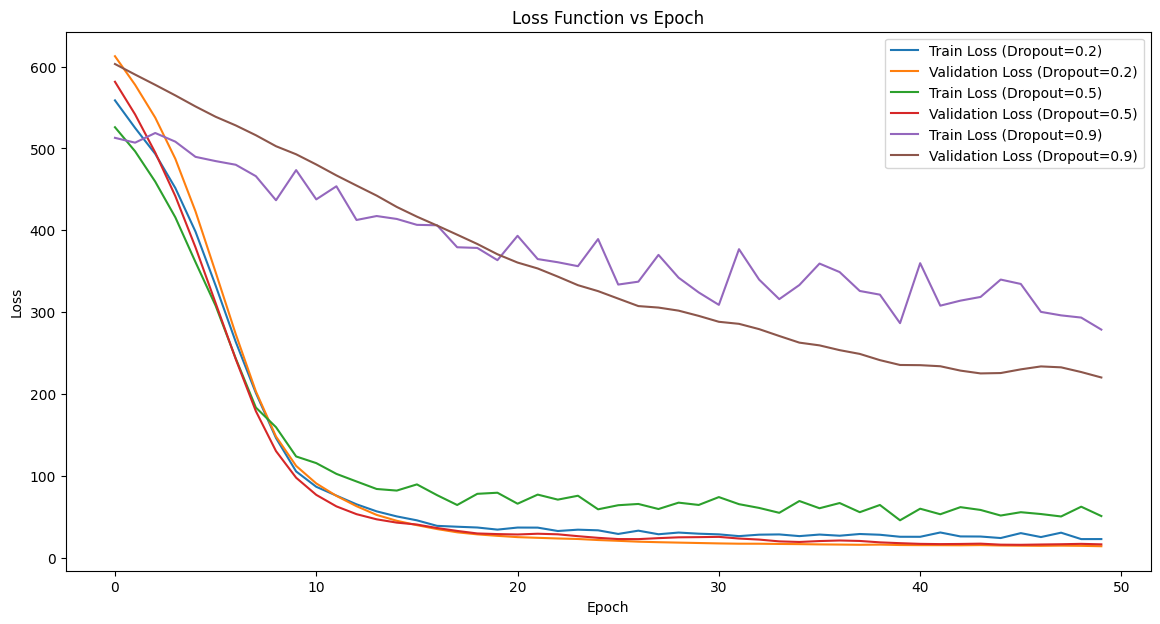

In [35]:
from re import A
def build_model(dropout_rate):
  model = Sequential([
      Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
      Dropout(dropout_rate),
      Dense(32,activation='relu'),
      Dropout(dropout_rate),
      Dense(1)

  ])
  model.compile(optimizer=Adam(),loss='mean_squared_error')
  return model
dropouts_rate = [0.2,0.5,0.9]
history_dict = {}

for rate in dropouts_rate:
  print(f"Training with dropout rate: {rate}")
  model = build_model(rate)
  history=History()
  history_dict[rate]=history
  model.fit(x_train,y_train,epochs=50,validation_split=0.2,verbose=0,callbacks=[history])
plt.figure(figsize=(14,7))
for rate,history in history_dict.items():
  plt.plot(history.history['loss'],label=f'Train Loss (Dropout={rate})')
  plt.plot(history.history['val_loss'],label=f'Validation Loss (Dropout={rate})')
plt.title('Loss Function vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# note implement it when you have deep neural network
# intrusion of dropout is for make every neuron show participate
